In [143]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

from IPython import display
import time

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

%matplotlib inline

In [144]:
swarm=xr.open_dataset('swarm.nc') #load the saved data from the swarming model simulation
#xr.Dataset.close(swarm)

In [145]:
def plot_state(X,Y,theta,colors):   

    U=np.cos(theta)
    V=np.sin(theta)
    
    plt.scatter(X,Y,30,c=colors,alpha=0.5)
    plt.quiver(X,Y,U,V,colors, scale=30)
    plt.xlim((-1,1)); plt.ylim((-1,1))


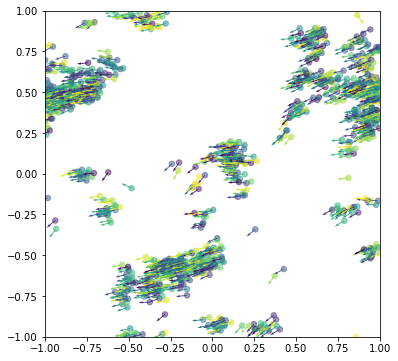

In [146]:
j=500;
fig = plt.figure(figsize=(6,6))
plot_state(swarm.x[:,j],swarm.y[:,j],swarm.th[:,j],swarm.colors);

## Gaussian Mixture Model

A Gaussian mixture model is a probabilistic model that assumes all the data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters.  https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html

In [147]:
j=500; #choose some time snapshot

features=np.stack((swarm.x[:,j],
              swarm.y[:,j],
              np.cos(swarm.th[:,j]),
              np.sin(swarm.th[:,j])),
              axis=1);

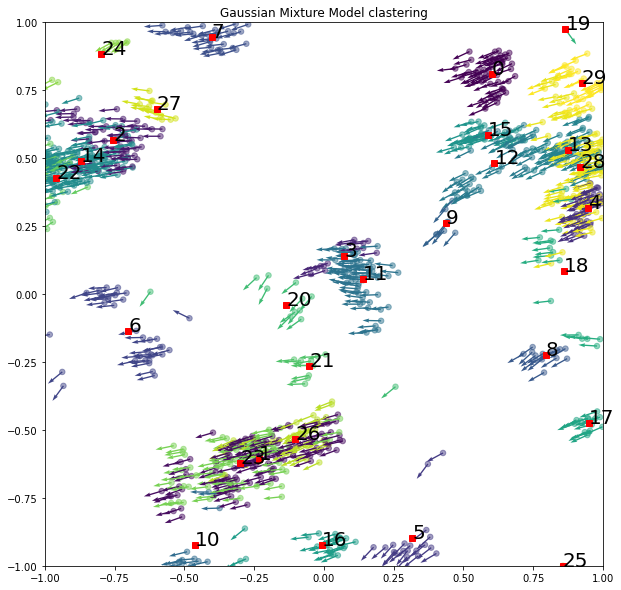

In [157]:
K=30 # number of clusters

gmm = GaussianMixture(n_components=K)
labels_gmm=gmm.fit_predict(features)
x_mean,y_mean=gmm.means_[:,0],gmm.means_[:,1]

fig = plt.figure(figsize=(10,10))
plot_state(swarm.x[:,j],swarm.y[:,j],swarm.th[:,j],labels_gmm)
plt.title('Gaussian Mixture Model clastering')
for k in range(K):
    plt.plot(x_mean[k],y_mean[k],'rs',markersize=6)
    plt.annotate(str(k), (x_mean[k],y_mean[k]), fontsize=20)    

## Bayesian information criterion (BIC)

In statistics, the Bayesian information criterion (BIC) or Schwarz information criterion (also SIC, SBC, SBIC) is a criterion for model selection among a finite set of models; models with lower BIC are generally preferred. It is based, in part, on the likelihood function and it is closely related to the Akaike information criterion (AIC).

When fitting models, it is possible to increase the likelihood by adding parameters, but doing so may result in overfitting. Both BIC and AIC attempt to resolve this problem by introducing a penalty term for the number of parameters in the model. https://en.wikipedia.org/wiki/Bayesian_information_criterion

Text(0, 0.5, 'Bayesian information criterion (BIC)')

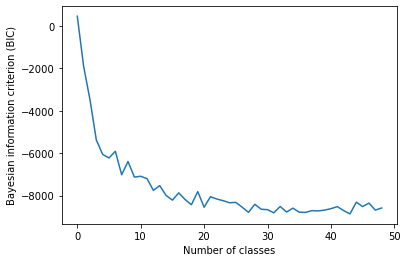

In [149]:
BIC=np.array([]);
for K in range(1,50):
    gmm = GaussianMixture(n_components=K)
    gmm.fit_predict(features)
    bic=gmm.bic(features)
    BIC=np.append(BIC,bic)

plt.plot(BIC); 
plt.xlabel('Number of classes'); 
plt.ylabel('Bayesian information criterion (BIC)')


In [150]:
K=15 #number of classes to use

## K-means

A Gaussian mixture model is a probabilistic model that assumes all the data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters.  https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html

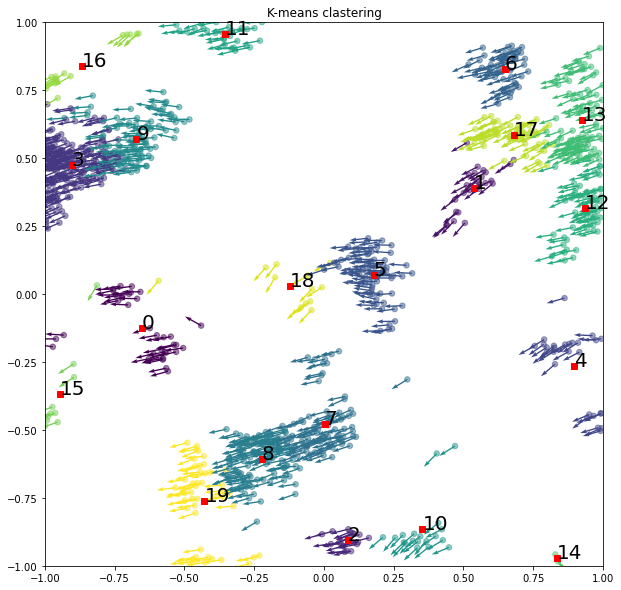

In [135]:
kmeans = KMeans(n_clusters=K).fit(features)
x_mean, y_mean =kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1]
labels_kmeans=kmeans.labels_

fig = plt.figure(figsize=(10,10))
plot_state(swarm.x[:,j],swarm.y[:,j],swarm.th[:,j],labels_kmeans)
plt.title('K-means clastering')
for k in range(K):
    plt.plot(x_mean[k],y_mean[k],'rs',markersize=6)
    plt.annotate(str(k), (x_mean[k],y_mean[k]), fontsize=20)     

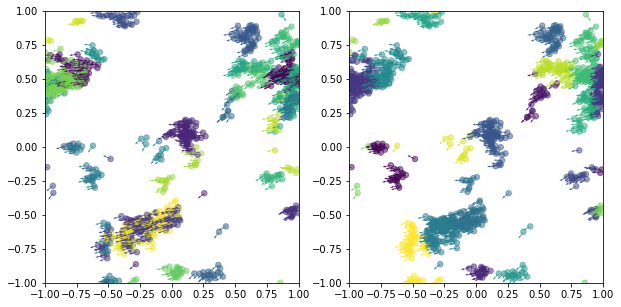

In [151]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plot_state(swarm.x[:,j],swarm.y[:,j],swarm.th[:,j],labels_gmm)
plt.subplot(1,2,2)
plot_state(swarm.x[:,j],swarm.y[:,j],swarm.th[:,j],labels_kmeans)



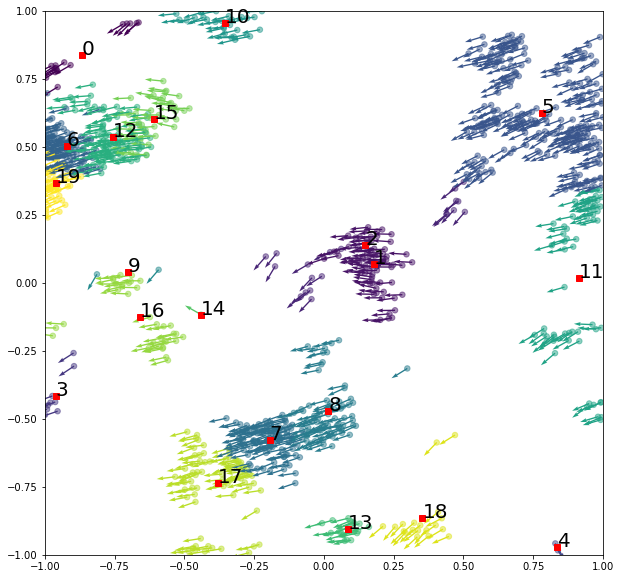

In [134]:
K=20

fig = plt.figure(figsize=(10,10))

ini=True

for j in np.arange(400,500,5):
        
    features=np.stack((swarm.x[:,j],
              swarm.y[:,j],
              np.cos(swarm.th[:,j]),
              np.sin(swarm.th[:,j])),
              axis=1);
    
    if ini: kmeans = KMeans(n_clusters=K).fit(xyz); ini=False
    else:   kmeans = KMeans(n_clusters=K, n_init=1,init=kmeans.cluster_centers_).fit(features)
    
    x_mean, y_mean =kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1]
    
    labels=kmeans.labels_


    #plotting results
    display.display(plt.gcf()); plt.clf()
    
    plot_state(swarm.x[:,j],swarm.y[:,j],swarm.th[:,j],labels)   
    
    for k in range(K):
        plt.plot(x_mean[k],y_mean[k],'rs',markersize=6)
        plt.annotate(str(k), (x_mean[k],y_mean[k]), fontsize=20)
        
    display.clear_output(wait=True)
    
    time.sleep(0.01)